In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [77]:
img = cv2.imread("red.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

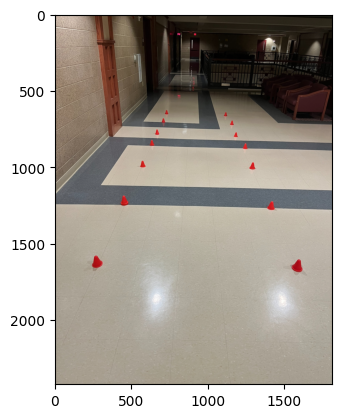

In [78]:
plt.imshow(img);

In [79]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

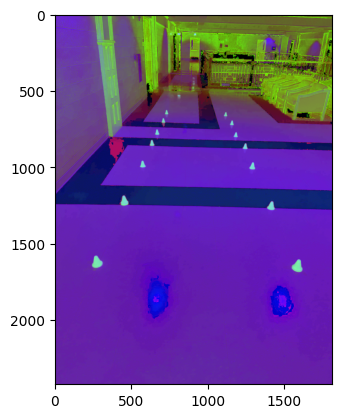

In [80]:
plt.imshow(hsv);

In [81]:
lower = np.array([115, 200, 150])
upper = np.array([180, 255, 255])

In [82]:
mask = cv2.inRange(hsv, lower, upper)

In [83]:
kernel = np.ones((8, 8))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

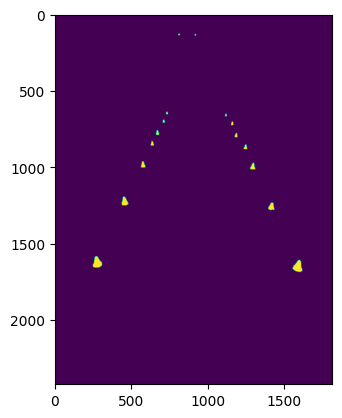

In [84]:
plt.imshow(mask);

In [85]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [86]:
len(contours)

16

In [87]:
new_img = img.copy()

In [88]:
new_img = cv2.drawContours(new_img, contours, -1, (0, 0, 0), 5)

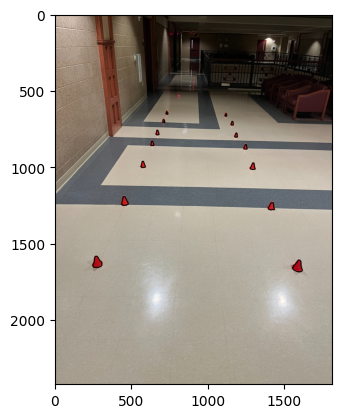

In [89]:
plt.imshow(new_img);

In [22]:
new_contours = []

In [23]:
for i in range(len(contours)):
    new_contours.append(contours[i].squeeze(axis=1))

In [24]:
for contour in new_contours:
    print(contour.shape)

(94, 2)
(79, 2)
(52, 2)
(77, 2)
(54, 2)
(54, 2)
(29, 2)
(28, 2)
(25, 2)
(34, 2)
(19, 2)
(19, 2)
(11, 2)
(10, 2)
(4, 2)
(8, 2)


In [25]:
np.mean(new_contours[0], axis=0)

array([1585.03191489, 1656.21276596])

In [26]:
points = []

In [27]:
for i in range(4):
    contour = new_contours[i]
    x_mean = int(np.mean(contour, axis=0)[0])
    y_mean = int(np.mean(contour, axis=0)[1])
    print(x_mean, y_mean)
    points.append((x_mean, y_mean))
    
    point_img = cv2.circle(mask, (x_mean, y_mean), 5, (0, 0, 0), 2)

1585 1656
275 1623
1409 1260
458 1223


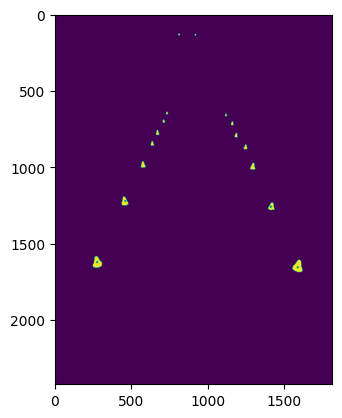

In [28]:
plt.imshow(point_img);

In [29]:
points

[(1585, 1656), (275, 1623), (1409, 1260), (458, 1223)]

In [30]:
slope1 = (points[2][1]-points[0][1])/(points[2][0]-points[0][0])

In [31]:
slope2 = (points[3][1]-points[1][1])/(points[3][0]-points[1][0])

In [32]:
print(slope1, slope2)

2.25 -2.185792349726776


In [33]:
y_int1 = points[0][1] - (points[0][0] * slope1)

In [34]:
y_int2 = points[1][1] - (points[1][0] * slope2)

In [90]:
line_img = img.copy()

In [91]:
line_img = cv2.line(line_img, (0, int(0 * slope1 + y_int1)), (img.shape[0], int(img.shape[0] * slope1 + y_int1)), 
                    (255, 0, 0), 5)

In [92]:
line_img = cv2.line(line_img, (0, int(0 * slope2 + y_int2)), (img.shape[0], int(img.shape[0] * slope2 + y_int2)), 
                    (255, 0, 0), 5)

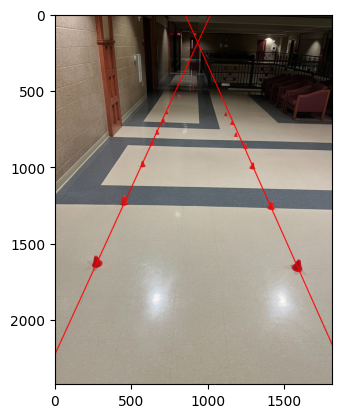

In [123]:
plt.imshow(line_img);

In [124]:
answer = line_img.copy()

In [125]:
answer = cv2.cvtColor(answer, cv2.COLOR_RGB2BGR)

In [126]:
cv2.imwrite("answer.png", answer)

True